# Student performance forcasting 

## Abstract 
Determining whether a student performance can be predicted, hence improved, based on different factors that play a role in a student educational life. The main aim of this project, Is to apply machine learning techniques that can put light on the most important factors that impact a student performance, In order to gain a better understanding of learners. 

## Motivation
Deciding whether a student will fail or pass is a challenging task. Administators, teachers, and essentially parents, deeply want to know whether a student will fail, or succeed, In order to make good decisions. Based on several factors like age, freetime, activities, parents job etc ... We will try to get a clearer idea on how all these factors influence the student grades. 
In order to achieve that, we will start with an existing data and use supervised learning techniques In order to predict the grades of a student. 
The main focus will be on interpreting the importance of each factor in a student's life. 

## Dataset 
<li> school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira) </li>
<li> sex - student's sex (binary: 'F' - female or 'M' - male)
<li> age - student's age (numeric: from 15 to 22)</li>
<li> address - student's home address type (binary: 'U' - urban or 'R' - rural)</li>
<li>famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)</li>
<li>Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)</li>
<li> Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 -  higher education)</li>
<li> Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education)</li>
<li> Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')</li>
<li> Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')</li>
<li> reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')</li>
<li> guardian - student's guardian (nominal: 'mother', 'father' or 'other')</li>
<li>traveltime - home to school travel time (numeric: 1 -  less than 15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)</li>
<li>studytime - weekly study time (numeric: 1 - less than 2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - more than 10 hours)</li>
<li>failures - number of past class failures (numeric: n if n>=1 and n less than 3, else 4)</li>
<li> schoolsup - extra educational support (binary: yes or no)</li>
<li> famsup - family educational support (binary: yes or no)</li>
<li> paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)</li>
<li> activities - extra-curricular activities (binary: yes or no)</li>
<li> nursery - attended nursery school (binary: yes or no)</li>
<li> higher - wants to take higher education (binary: yes or no)</li>
<li> internet - Internet access at home (binary: yes or no)</li>
<li> romantic - with a romantic relationship (binary: yes or no)</li>
<li> famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)</li>
<li> freetime - free time after school (numeric: from 1 - very low to 5 - very high)</li>
<li> goout - going out with friends (numeric: from 1 - very low to 5 - very high)</li>
<li>Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)</li>
<li> Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)</li>
<li> health - current health status (numeric: from 1 - very bad to 5 - very good)</li>
<li> absences - number of school absences (numeric: from 0 to 93)</li>
<li> G1 - first period grade (numeric: from 0 to 20) </li>
<li> G2 - second period grade (numeric: from 0 to 20)</li>
<b>target variable :<br></b>
    <li> G3 - final grade (numeric: from 0 to 20, output target)</li>


In [145]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score,mean_squared_error
from scipy import stats as stats 
from sklearn.preprocessing import LabelEncoder
from category_encoders import BinaryEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix

In [146]:
df1=pd.read_csv('student-por.csv',sep=';')
df2=pd.read_csv('student-mat.csv',sep=';')
df = pd.concat([df1, df2], ignore_index=True, sort=False)


In [4]:
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
1040,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
1041,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
1042,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [ ]:
df.shape

In [ ]:
df.info()

In [ ]:
df.isna().sum().sum()

In [ ]:
df.duplicated().sum()

### Categorizing data 

In [147]:
binary_cols = list()
categorical_features = list()
numeric_features = df.select_dtypes(['float','int']).columns
objects=df.select_dtypes('object').columns
for col in objects: 
    if df[col].nunique() >2 : 
        categorical_features.append(col)
    else : 
        binary_cols.append(col)
print(f"Numerical features : {numeric_features}") 
print(f"Categorical features :  {categorical_features}")
print(f"binary features : {binary_cols}")

Numerical features : Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2',
       'G3'],
      dtype='object')
Categorical features :  ['Mjob', 'Fjob', 'reason', 'guardian']
binary features : ['school', 'sex', 'address', 'famsize', 'Pstatus', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']


In [5]:
df[numeric_features].describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000
mean,16.726054,2.603448,2.387931,1.522989,1.970307,0.264368,3.935824,3.201149,3.156130,1.494253,2.284483,3.543103,4.434866,11.213602,11.246169,11.341954
std,1.239975,1.124907,1.099938,0.731727,0.834353,0.656142,0.933401,1.031507,1.152575,0.911714,1.285105,1.424703,6.210017,2.983394,3.285071,3.864796
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,9.000000,9.000000,10.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


<AxesSubplot:>

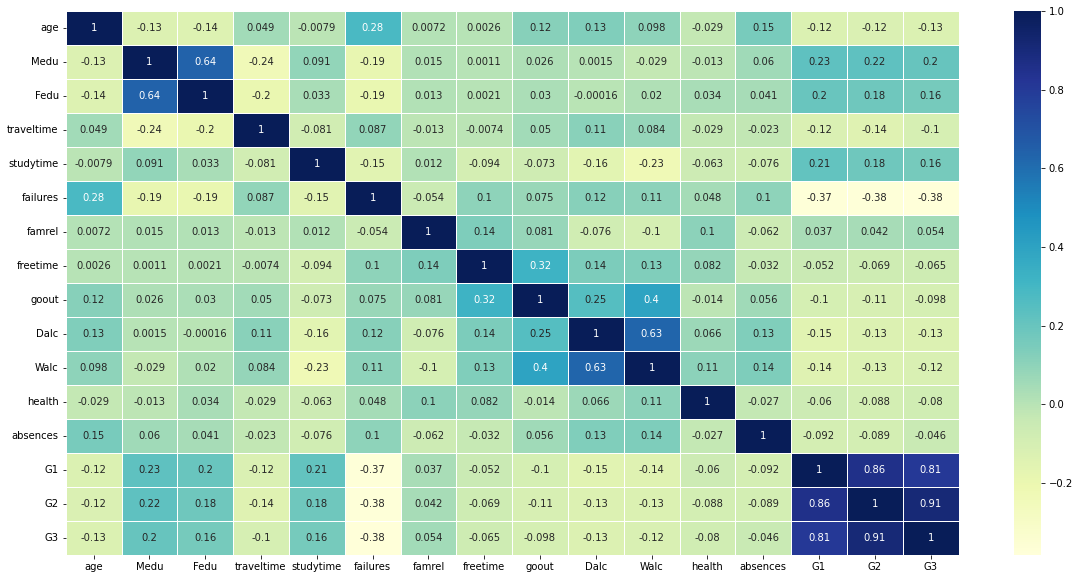

In [6]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), cmap="YlGnBu",linewidths=0.5,annot=True)

We may see a high correlation between G1 and G2, which is quite reasonable, we will be keeping both while using the random forests model but we will elliminate one while using the logistic regression model since that It may lead to overfitting. 
The same thing applies to Dalc and Walc, as well as Fedu and Medu, but regarding these ones we will be running tests on them later on. 

## Feature encoding

In [ ]:
df[categorical_features]

In [148]:
one_hot_encoder = OneHotEncoder(handle_unknown='ignore')
one_hot_encoded = one_hot_encoder.fit_transform(df[categorical_features])
one_hot_encoded_df = pd.DataFrame(one_hot_encoded.toarray(), columns=one_hot_encoder.get_feature_names(categorical_features))

# Apply binary encoding to the specified columns
binary_encoder = BinaryEncoder(cols=binary_cols)
binary_encoded = binary_encoder.fit_transform(df[binary_cols])
#le_data=pd.DataFrame()
#le_encoder = LabelEncoder()
#for feature in binary_cols:
 #   binary_data[feature] = binary_encoder.fit_transform(df[feature])
# Concatenate the encoded features with the original DataFrame
encoded_data = pd.concat([binary_encoded, df[numeric_features],one_hot_encoded_df], axis=1)

C:\Users\rayen\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [37]:
encoded_data

,school_0,school_1,sex_0,sex_1,address_0,address_1,famsize_0,famsize_1,Pstatus_0,Pstatus_1,...,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
0,0,1,0,1,0,1,0,1,0,1,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0,1,0,1,0,1,0,1,1,0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0,1,0,1,0,1,1,0,1,0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0,1,0,1,0,1,0,1,1,0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0,1,0,1,0,1,0,1,1,0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,1,0,1,0,0,1,1,0,0,1,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1040,1,0,1,0,0,1,1,0,1,0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1041,1,0,1,0,1,0,0,1,1,0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1042,1,0,1,0,1,0,1,0,1,0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [149]:
encoded_data2= encoded_data.drop(['G1','G2'],axis=1)

In [240]:
encoded_data.columns

Index(['school_0', 'school_1', 'sex_0', 'sex_1', 'address_0', 'address_1',
       'famsize_0', 'famsize_1', 'Pstatus_0', 'Pstatus_1', 'schoolsup_0',
       'schoolsup_1', 'famsup_0', 'famsup_1', 'paid_0', 'paid_1',
       'activities_0', 'activities_1', 'nursery_0', 'nursery_1', 'higher_0',
       'higher_1', 'internet_0', 'internet_1', 'romantic_0', 'romantic_1',
       'age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2',
       'G3', 'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services',
       'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other',
       'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home',
       'reason_other', 'reason_reputation', 'guardian_father',
       'guardian_mother', 'guardian_other'],
      dtype='object')

In [245]:
feature_names = encoded_data2.drop(['G3'],axis=1).columns
feature_names.shape

(56,)

In [150]:
encoded_data['G3']=np.where(df['G3']>10,'pass','fail')
encoded_data2['G3']=np.where(df['G3']>10,'pass','fail')

In [151]:
encoded_data['G3'].value_counts(normalize=True)
encoded_data2['G3'].value_counts(normalize=True)

pass    0.633142
fail    0.366858
Name: G3, dtype: float64

## Testing on the logistic regression model 

In [153]:
from sklearn.model_selection import StratifiedShuffleSplit

feature_cols = [x for x in encoded_data2.columns if x != 'G3']


# Split the data into two parts with 1500 points in the test data
# This creates a generator
strat_shuff_split = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)

# Get the index values from the generator
train_idx, test_idx = next(strat_shuff_split.split(encoded_data2[feature_cols], encoded_data2['G3']))

# Create the data sets
X_train = encoded_data2.loc[train_idx, feature_cols]
y_train = encoded_data2.loc[train_idx, 'G3']

X_test = encoded_data2.loc[test_idx, feature_cols]
y_test = encoded_data2.loc[test_idx, 'G3']

In [11]:
y_train.value_counts(normalize=True)

pass    0.632877
fail    0.367123
Name: G3, dtype: float64

In [95]:
y_test.value_counts(normalize=True)

pass    0.633758
fail    0.366242
Name: G3, dtype: float64

The model Is evenly doing good, with slightly a high false true values that need to be addressed 

In [155]:
from sklearn.linear_model import LogisticRegression
scores = pd.DataFrame(columns=['Model','score'])
logist_model = LogisticRegression(max_iter=100000)
logist_model = logist_model.fit(X_train, y_train)
score = logist_model.score(X_test, y_test)
y_pred=logist_model.predict(X_test)
scores = scores.append({'Model':'Logistic regression','score' : score}, ignore_index=True) 
scores

C:\Users\rayen\AppData\Local\Temp\ipykernel_15752\2287190000.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores = scores.append({'Model':'Logistic regression','score' : score}, ignore_index=True)


,Model,score
0,Logistic regression,0.748408


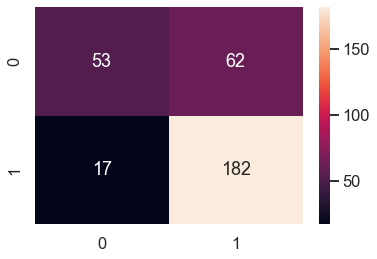

In [103]:
cm = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cm, annot=True, fmt='d')
### END SOLUTION

In [ ]:

param_grid = {
    'pca__n_components': [10, 15, 20, 40, 50, 59],
    'logreg__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'logreg__penalty': ['l2','l1'],
    'logreg__solver': ['lbfgs', 'newton-cg', 'sag', 'saga'],
}
logreg = LogisticRegression(max_iter=100000) 
pca = PCA()
grid_search = GridSearchCV(
    estimator=Pipeline([('pca', pca), ('logreg', logreg)]),
    param_grid=param_grid,
    cv=5,
    n_jobs=-1
)

# fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# print the best hyperparameters
print("Best hyperparameters: ", grid_search.best_params_)







In [ ]:
from skopt import BayesSearchCV
pipe = Pipeline([
    ('pca', PCA()),
    ('logreg', LogisticRegression())
])

# Define the hyperparameter search space
search_space = {
    'pca__n_components': [10, 15, 17,20,25,30,32],
    'logreg__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'logreg__penalty': ['l1', 'l2'],
    'logreg__solver': ['liblinear']
}

# Create the BayesSearchCV object
bayes_cv = BayesSearchCV(
    pipe,
    search_space,
    cv=5,
    n_iter=50,
    n_jobs=-1,
    random_state=42
)

# Fit the BayesSearchCV object to the data
bayes_cv.fit(X_train, y_train)

In [ ]:
bayes_cv.best_estimator_

In [12]:
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [104]:
pca = PCA(n_components=14)
from sklearn.metrics import accuracy_score
# Transform the data using the trained PCA object
X_train_transformed = pca.fit_transform(X_train)
X_test_transformed = pca.transform(X_test)

# Set up the logistic regression model with the best hyperparameters
logreg = LogisticRegression(
    penalty='l1',
    solver='liblinear',
    C=0.19
)

# Train the logistic regression model on the transformed training data
logreg.fit(X_train_transformed, y_train)

# Make predictions on the transformed testing data
y_pred = logreg.predict(X_test_transformed)

# Evaluate the performance of the trained model on the testing data
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy on testing data: ", accuracy)


Accuracy on testing data:  0.7133757961783439


In [105]:
scores=scores.append({'Model':'Logistic regression_PCA','score' : accuracy}, ignore_index=True) 
scores

C:\Users\rayen\AppData\Local\Temp\ipykernel_15752\2353376457.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores=scores.append({'Model':'Logistic regression_PCA','score' : accuracy}, ignore_index=True)


,Model,score
0,Logistic regression,0.748408
1,Logistic regression_PCA,0.713376


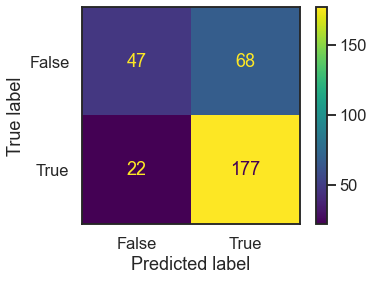

In [106]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
confusion_matrix = confusion_matrix(y_test, y_pred)
cm_display=ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()


In [23]:
coef=logreg.coef_

In [18]:

for i in range(len(coef[0])):
    print(f"PC{i+1} coefficient: {coef[0][i]}")

PC1 coefficient: -0.19187031591597475
PC2 coefficient: -1.2268306572135925
PC3 coefficient: 0.09069542402513861
PC4 coefficient: -0.09094506556765437
PC5 coefficient: 0.0021607335702608127
PC6 coefficient: -0.45733054912892185
PC7 coefficient: 0.12236581734171695
PC8 coefficient: 0.0
PC9 coefficient: -0.13454723708225227
PC10 coefficient: 0.0
PC11 coefficient: 0.10440316868293628
PC12 coefficient: 0.0
PC13 coefficient: -0.12268546138589076
PC14 coefficient: -0.2470854470363004


Okay so mainly we will be analyzing and interpreting the 3 following components : pc2,pc6,pc14 since that they have the most significant affect on our target variable.
<ul> 
    <li> The second component is having a huge negative impact on the target variable with -1.227 coef, it is mainly dominating the other coefficients.</li> 
    <li> Pc6 is itself having a remarkable impact with a -0.45 coef </li> 
    <li> Pc14 isn't affecting the target variable that much, but it may be used later in interpretations. </li> 

In [19]:
feature_weights = np.multiply(pca.components_, np.sqrt(pca.explained_variance_[:, np.newaxis]))
most_important_weights = np.asarray([feature_weights[1],feature_weights[5],feature_weights[13]])
# print the weights of each original feature in each principal component
for i in range(most_important_weights.shape[0]):
    print(f"PC{i+1} weights:")
    for j in range(feature_weights.shape[1]):
        if (encoded_data.columns[j] !='G3') : 
            print(f"{encoded_data.columns[j]}: {most_important_weights[i][j]}")

PC1 weights:
school_0: 0.09249978632295205
school_1: -0.09249978632295235
sex_0: 0.0105706720410427
sex_1: -0.0105706720410427
address_0: 0.06575244944316198
address_1: -0.06575244944316197
famsize_0: -0.027681076353713193
famsize_1: 0.027681076353713172
Pstatus_0: 0.006037907141399206
Pstatus_1: -0.006037907141399206
schoolsup_0: -0.04089228108010775
schoolsup_1: 0.04089228108010775
famsup_0: 0.005188754805153555
famsup_1: -0.005188754805153555
paid_0: -0.011589965979420658
paid_1: 0.011589965979420663
activities_0: -0.022543951655603054
activities_1: 0.022543951655603054
nursery_0: 0.01857802933532701
nursery_1: -0.01857802933532701
higher_0: 0.07508170299174066
higher_1: -0.07508170299174066
internet_0: -0.06735984154365397
internet_1: 0.06735984154365397
romantic_0: 0.036335952101107745
romantic_1: -0.036335952101107745
age: 0.08921073034592003
Medu: -0.30481276489072234
Fedu: -0.24990626904995497
traveltime: 0.12991274708002223
studytime: -0.1560705583527816
failures: 0.2508825569

In [24]:
from sklearn.feature_selection import RFE
pipeline = Pipeline([
    ('rfe', RFE(estimator=LogisticRegression(solver='liblinear'))),
    ('lr', LogisticRegression(solver='liblinear'))
])

# Define the hyperparameter grid
param_grid = {
    'rfe__n_features_to_select': [10, 5, 15, 20, 33, 28, 50, 59],
    'lr__C': [0.01, 0.1, 1, 10, 100],
}

# Create a GridSearchCV object
cv = GridSearchCV(pipeline, param_grid, cv=5)

# Fit the GridSearchCV object to the training data
cv.fit(X_train, y_train)

# Get the best hyperparameters and score
print('Best hyperparameters:', cv.best_params_)
print('Best score:', cv.best_score_)

KeyboardInterrupt: 

In [ ]:
y_pred = cv.predict(X_test)
acc_log_rfe=accuracy_score(y_test,y_pred)


In [ ]:
scores=scores.append({'Model':'Logreg with RFE','score' : acc_log_rfe}, ignore_index=True) 
scores

As seen RFE is not helping the Lr model so we can't rely on it on further analysis. 

## Testing on the random forests model

In [156]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [157]:
tree_list = [15, 25, 50, 100, 200, 400,500]
error_list = list()
for n_trees in tree_list:
    
    # Initialize the gradient boost classifier
    RF_classifier=RandomForestClassifier(n_estimators=n_trees, random_state=42)

    # Fit the model
    print(f'Fitting model with {n_trees} trees')
    RF_classifier.fit(X_train.values, y_train.values)
    y_pred = RF_classifier.predict(X_test)

    # Get the error
    error = accuracy_score(y_test, y_pred)
    
    # Store it
    error_list.append(pd.Series({'n_trees': n_trees, 'score': error}))

error_df = pd.concat(error_list, axis=1).T.set_index('n_trees')

error_df

Fitting model with 15 trees
Fitting model with 25 trees
Fitting model with 50 trees
Fitting model with 100 trees


C:\Users\rayen\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
C:\Users\rayen\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
C:\Users\rayen\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
C:\Users\rayen\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Fitting model with 200 trees


C:\Users\rayen\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Fitting model with 400 trees


C:\Users\rayen\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Fitting model with 500 trees


C:\Users\rayen\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


,score
n_trees,
15.0,0.675159
25.0,0.697452
50.0,0.700637
100.0,0.703822
200.0,0.703822
400.0,0.697452
500.0,0.697452


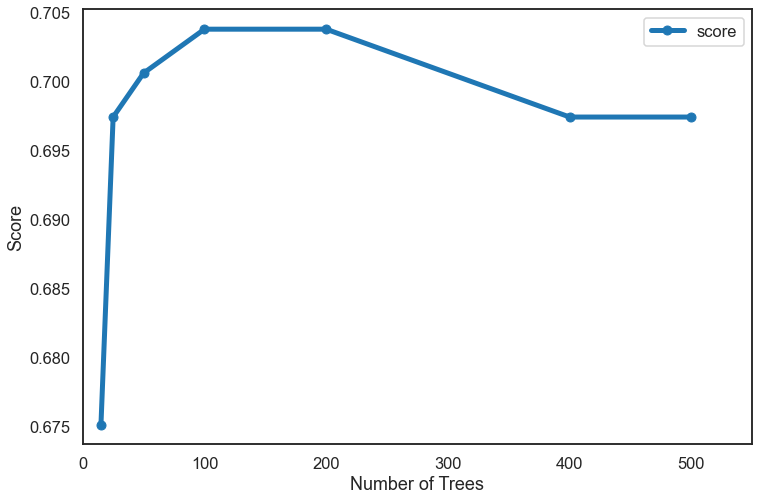

In [108]:
sns.set_context('talk')
sns.set_style('white')
# Create the plot
ax = error_df.plot(marker='o', figsize=(12, 8), linewidth=5)

# Set parameters
ax.set(xlabel='Number of Trees', ylabel='Score')
ax.set_xlim(0, max(error_df.index)*1.1);

so basically we will stick with 200 trees. 

In [ ]:
param_grid = {'max_features': [10,20,30,25,35,40,50,55,59],
             'max_depth' : [5,10,7,15,20,21,25,30],             }
RandomF = RandomForestClassifier(n_estimators = 200,random_state = 42)
RDCV = GridSearchCV(estimator = RandomF, 
                      param_grid=param_grid, 
                      scoring='accuracy',
                      n_jobs=-1)
RDCV = RDCV.fit(X_train, y_train)


In [33]:
RDCV.best_estimator_

RandomForestClassifier(max_depth=5, max_features=10, n_estimators=50,
                       random_state=42)

In [158]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
best_rf = RandomForestClassifier(max_depth=5, max_features=10, n_estimators=200,
                       random_state=42)

best_rf.fit(X_train.values, y_train.values)
y_preddddd = best_rf.predict(X_test)

C:\Users\rayen\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [159]:
accuracy_score(y_test, best_rf.predict(X_test))


C:\Users\rayen\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


0.7261146496815286

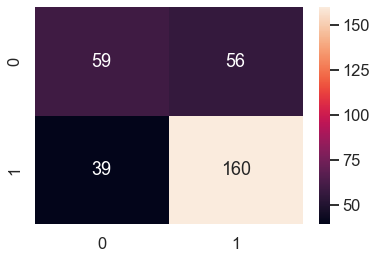

In [160]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cm, annot=True, fmt='d')
### END SOLUTION

Basically the random forests model fails to correctly predict the failure of a student. 

In [161]:
scores = scores.append({'Model':'Random_forests','score' : accuracy_score(y_test, best_rf.predict(X_test))
}, ignore_index=True) 


C:\Users\rayen\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
C:\Users\rayen\AppData\Local\Temp\ipykernel_15752\1803015421.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores = scores.append({'Model':'Random_forests','score' : accuracy_score(y_test, best_rf.predict(X_test))


In [79]:
scores

,Model,score
0,Logistic regression,0.748408
1,Random_forests,0.726115
2,Gradiant boosting,0.735669
3,Adaboost,0.732484
4,Logistic regression_PCA,0.710191
5,Random_forests,0.726115


## Testing on gradiant boosting algorithm 

In [162]:
from sklearn.ensemble import GradientBoostingClassifier
GBC1 = GradientBoostingClassifier()
GBC1=GBC1.fit(X_train,y_train)
ypred= GBC1.predict(X_test)
accuracy_score(y_test,y_pred)


0.697452229299363

In [163]:
from sklearn.ensemble import GradientBoostingClassifier

error_list = list()

# Iterate through various possibilities for number of trees
tree_list = [15, 25,20, 50, 100, 200, 400]
for n_trees in tree_list:
    
    # Initialize the gradient boost classifier
    GBC = GradientBoostingClassifier(n_estimators=n_trees, random_state=51)

    # Fit the model
    print(f'Fitting model with {n_trees} trees')
    GBC.fit(X_train.values, y_train.values)
    y_pred = GBC.predict(X_test)

    # Get the error
    error = accuracy_score(y_test, y_pred)
    
    # Store it
    error_list.append(pd.Series({'n_trees': n_trees, 'error': error}))

error_df = pd.concat(error_list, axis=1).T.set_index('n_trees')

error_df

Fitting model with 15 trees
Fitting model with 25 trees
Fitting model with 20 trees
Fitting model with 50 trees
Fitting model with 100 trees


C:\Users\rayen\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(
C:\Users\rayen\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(
C:\Users\rayen\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(
C:\Users\rayen\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(
C:\Users\rayen\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but GradientBoostingClassifier was f

Fitting model with 200 trees


C:\Users\rayen\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(


Fitting model with 400 trees


C:\Users\rayen\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(


,error
n_trees,
15.0,0.735669
25.0,0.735669
20.0,0.738854
50.0,0.716561
100.0,0.694268
200.0,0.687898
400.0,0.681529


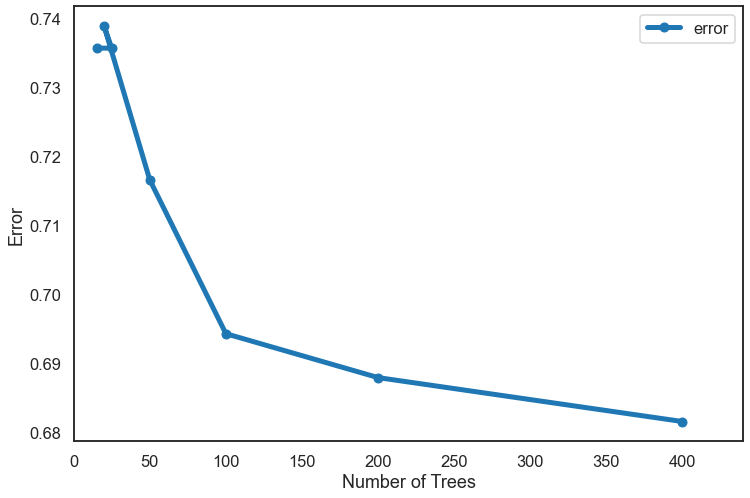

In [56]:
sns.set_context('talk')
sns.set_style('white')

# Create the plot
ax = error_df.plot(marker='o', figsize=(12, 8), linewidth=5)

# Set parameters
ax.set(xlabel='Number of Trees', ylabel='Error')
ax.set_xlim(0, max(error_df.index)*1.1);
### END SOLUTION

In [ ]:

GB_grid = {'n_estimators': tree_list,
            'learning_rate': [0.1, 0.01, 0.001, 0.0001],
            'subsample': [1.0, 0.5],
            'max_features': [10,5,15,20,25,30,35,40,45,50,55,59],
            'max_depth': [3,7,10,12]
               
}

# The grid search object
GV_GBC = GridSearchCV(GradientBoostingClassifier(random_state=42), 
                      param_grid=GB_grid, 
                      scoring='accuracy',
                      n_jobs=-1)

# Do the grid search
GV_GBC = GV_GBC.fit(X_train, y_train)

The best value of n_trees is  25

In [50]:
gb_pipeline = Pipeline([
    ('GB', GradientBoostingClassifier(random_state=42))
])

# Define the hyperparameter search space
param_grid = {
    'GB__n_estimators': (100, 500),
    'GB__max_depth': (3, 10),
    'GB__learning_rate': (0.001, 1.0, 'log-uniform')
}

# Define the BayesSearchCV object
gb_bayes_search = BayesSearchCV(
    estimator=gb_pipeline,
    search_spaces=param_grid,
    scoring='accuracy',
    cv=5,
    n_jobs=-1,
    n_iter=150,

)

# Fit the BayesSearchCV object to the data
gb_bayes_search.fit(X_train, y_train)

BayesSearchCV(cv=5,
              estimator=Pipeline(steps=[('GB',
                                         GradientBoostingClassifier(random_state=42))]),
              n_iter=150, n_jobs=-1, scoring='accuracy',
              search_spaces={'GB__learning_rate': (0.001, 1.0, 'log-uniform'),
                             'GB__max_depth': (3, 10),
                             'GB__n_estimators': (100, 500)})

In [112]:
gb_pred=gb_bayes_search.predict(X_test) 
accuracy_score(y_test,y_pred)

NameError: name 'gb_bayes_search' is not defined

###  For gradiant boosting algorithm, the best score is given by the following hyperparameters

In [165]:
best_GB = GradientBoostingClassifier(n_estimators=15, random_state=51)
best_GB.fit(X_train,y_train)
y_pred=best_GB.predict(X_test)   

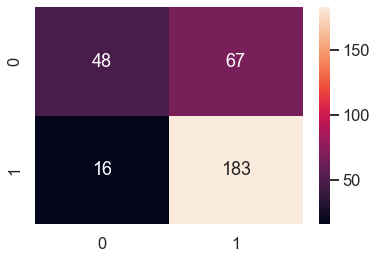

In [166]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cm, annot=True, fmt='d')
### END SOLUTION

So basically, the best score is given by 15 trees and random state of 51 


In [167]:
scores = scores.append({'Model':'Gradiant boosting ','score' : accuracy_score(y_test,y_pred)}, ignore_index=True) 


C:\Users\rayen\AppData\Local\Temp\ipykernel_15752\2622929145.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores = scores.append({'Model':'Gradiant boosting ','score' : accuracy_score(y_test,y_pred)}, ignore_index=True)


In [118]:
scores

,Model,score
0,Logistic regression,0.748408
1,Logistic regression_PCA,0.713376
2,Gradiant boosting,0.735669


## Testing on ADAboost algorithm 

In [168]:
from sklearn.ensemble import AdaBoostClassifier

In [169]:
AdaB = AdaBoostClassifier(random_state=51 )
AdaB.fit(X_train,y_train)
y_pred = AdaB.predict(X_test)
accuracy_score(y_test,y_pred)

0.7292993630573248

In [170]:
AdaB = AdaBoostClassifier(random_state=51 )
AdaB.fit(X_train,y_train)
y_pred = AdaB.predict(X_train)
accuracy_score(y_train,y_pred)

0.7780821917808219

So basically we are slightly having an overfitting problem that need to be addressed

In [107]:
from skopt.space import Real, Categorical, Integer
ADAB_pipeline = Pipeline([
    ('adaboostclassifier', AdaBoostClassifier(random_state=51 ))
])

# Define the hyperparameter search space
param_grid = {
    'adaboostclassifier__n_estimators': Integer(50, 500),
    'adaboostclassifier__learning_rate': Real(0.01, 1.0, prior='log-uniform'),
}

# Define the BayesSearchCV object
ADB_bayes_search = BayesSearchCV(
    estimator=ADAB_pipeline,
    search_spaces=param_grid,
    scoring='accuracy',
    cv=5,
    n_jobs=-1,
    n_iter=150,
)

# Fit the BayesSearchCV object to the data
ADB_bayes_search.fit(X_train, y_train)

BayesSearchCV(cv=5,
              estimator=Pipeline(steps=[('adaboostclassifier',
                                         AdaBoostClassifier(random_state=51))]),
              n_iter=150, n_jobs=-1, scoring='accuracy',
              search_spaces={'adaboostclassifier__learning_rate': Real(low=0.01, high=1.0, prior='log-uniform', transform='normalize'),
                             'adaboostclassifier__n_estimators': Integer(low=50, high=500, prior='uniform', transform='normalize')})

In [29]:
ADB_bayes_search.best_estimator_

NameError: name 'ADB_bayes_search' is not defined

In [89]:
y_pred = ADB_bayes_search.predict(X_test)
accuracy_score(y_test,y_pred)

NameError: name 'ADB_bayes_search' is not defined

In [122]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cm, annot=True, fmt='d')
### END SOLUTION

ValueError: Found input variables with inconsistent numbers of samples: [314, 730]

In [171]:
AdaB = AdaBoostClassifier(learning_rate=0.030959868355900966, random_state=51)
AdaB.fit(X_train,y_train)
y_pred = AdaB.predict(X_test)
accuracy_score(y_test,y_pred)

0.732484076433121

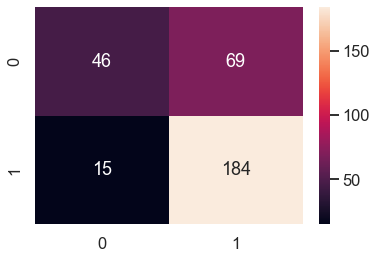

In [172]:
cm = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cm, annot=True, fmt='d')
### END SOLUTION

So by tuning the learning rate hyperparameter, we reduced the overfitting. And we got better precision. 


In [173]:
scores = scores.append({'Model':'Adaboost ','score' : accuracy_score(y_test,y_pred)}, ignore_index=True) 


C:\Users\rayen\AppData\Local\Temp\ipykernel_15752\1036484009.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores = scores.append({'Model':'Adaboost ','score' : accuracy_score(y_test,y_pred)}, ignore_index=True)


In [126]:
scores

,Model,score
0,Logistic regression,0.748408
1,Logistic regression_PCA,0.713376
2,Gradiant boosting,0.735669
3,Adaboost,0.732484


### Combining the ADAboost classifier with the Random forests classifier 

In [176]:
from sklearn.ensemble import VotingClassifier

In [231]:
voting_classifier = VotingClassifier(
    estimators=[('rf', best_rf), ('ada', Ada_vot)],
    voting='soft',
    weights= [2,1]
)
voting_classifier=voting_classifier.fit(X_train, y_train)
y_pred=voting_classifier.predict(X_test)
accuracy_score(y_test,y_pred)


0.7388535031847133

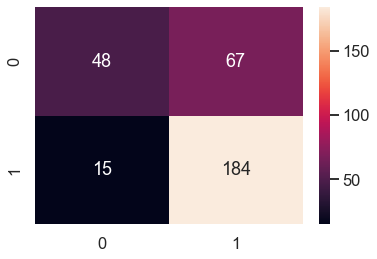

In [232]:
cm = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cm, annot=True, fmt='d')
### END SOLUTION

By combining both models, we slightly improved the performance of our model. Now it's time to interpret It 

## Interpreting the Models 

Since that Voting classifier class does not come with feature_importance attribute, we will compute it manually. 

In [253]:
def compute_feature_importance(voting_clf, weights,names):
    """ Function to compute feature importance of Voting Classifier """
    feature_importance = dict()
    for est in voting_clf.estimators_:
        feature_importance[str(est)] = est.feature_importances_
    
    fe_scores = [0]*len(list(feature_importance.values())[0])
    for idx, imp_score in enumerate(feature_importance.values()):
        imp_score_with_weight = imp_score*weights[idx]
        fe_scores = list(np.add(fe_scores, list(imp_score_with_weight)))
    feature_importance_df = pd.DataFrame({'Feature': names, 'Importance': fe_scores})
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
    return feature_importance_df

In [254]:
compute_feature_importance(voting_classifier,[2,1],feature_names)

,Feature,Importance
31,failures,1.163011
20,higher_0,0.233523
21,higher_1,0.160147
0,school_0,0.137315
38,absences,0.112259
1,school_1,0.087938
28,Fedu,0.084465
33,freetime,0.063107
27,Medu,0.062438
34,goout,0.060235


We will compare the feature importances of the 3 ensamble methods In order to see which features consistently appear as important across all models.

<b> Random forests classifier 

Text(0, 0.5, 'Feature')

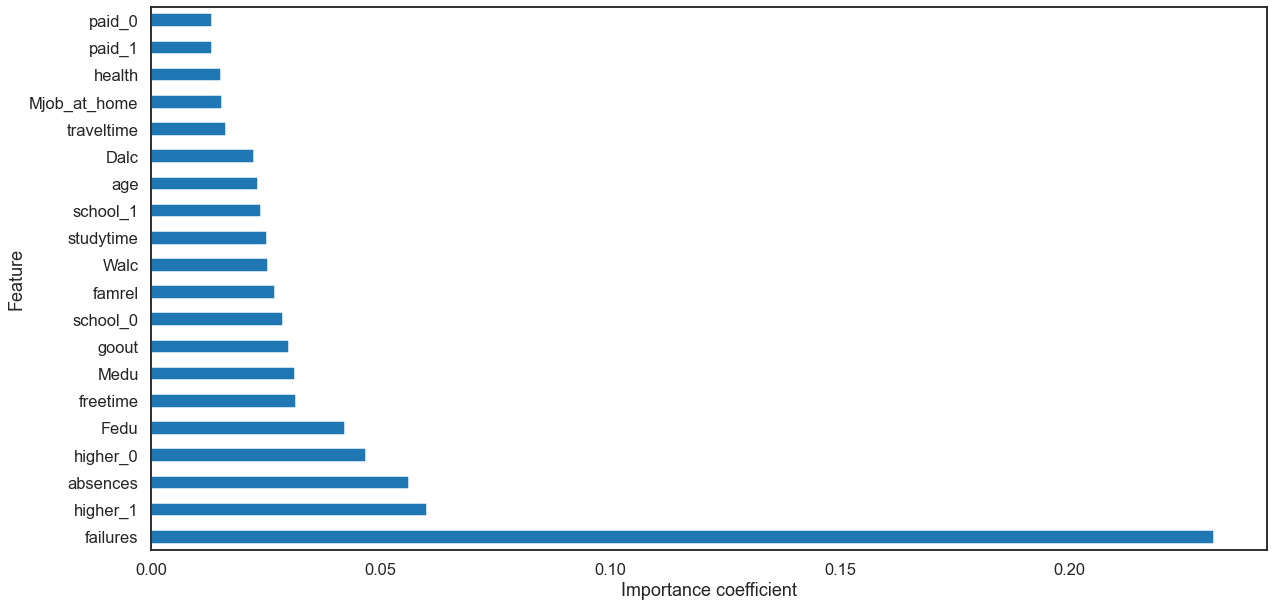

In [99]:
plt.figure(figsize=(20,10))
feat_importances_rdf = pd.Series(best_rf.feature_importances_, index=feature_cols)
feat_importances_rdf.nlargest(20).plot(kind='barh')
plt.xlabel("Importance coefficient")
plt.ylabel("Feature")



<b> Gradiant boosting 

Text(0, 0.5, 'Feature')

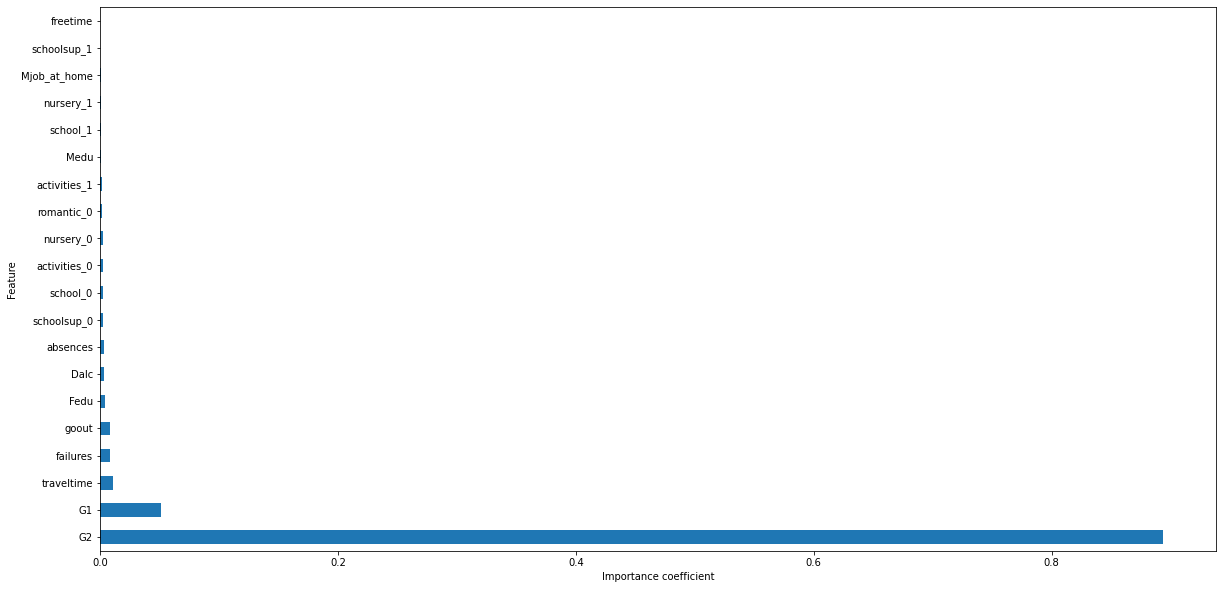

In [35]:
plt.figure(figsize=(20,10))
feat_importances_GB = pd.Series(best_GB.feature_importances_, index=feature_cols)
feat_importances_GB.nlargest(20).plot(kind='barh')
plt.xlabel("Importance coefficient")
plt.ylabel("Feature")

<b> ADABOOST 

Text(0, 0.5, 'Feature')

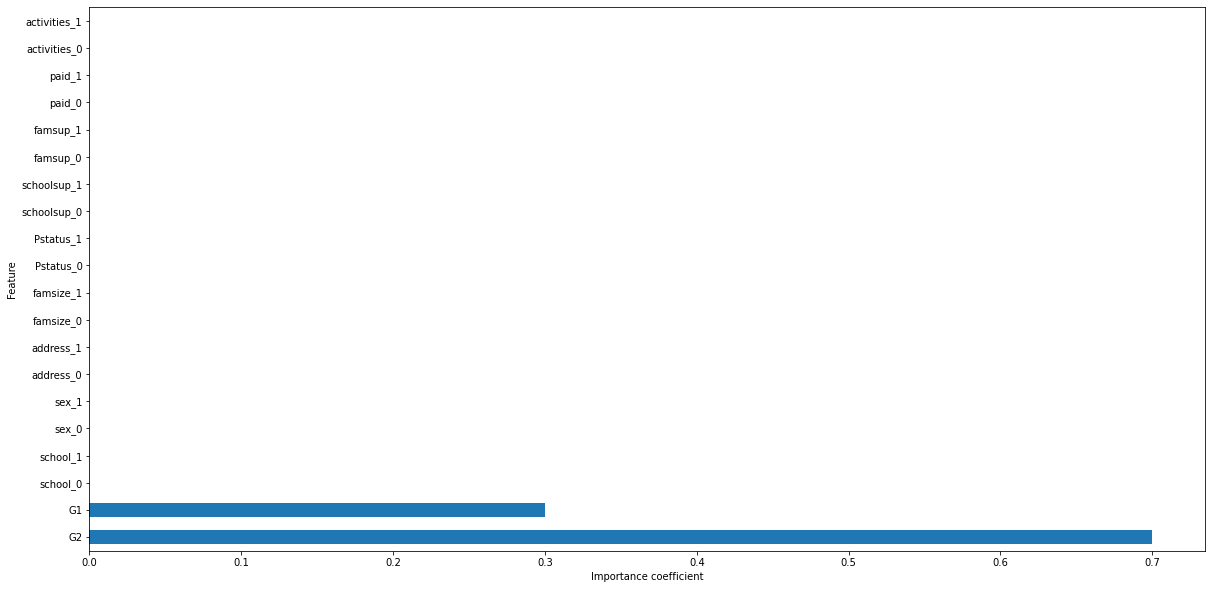

In [36]:
plt.figure(figsize=(20,10))
feat_importances_adab = pd.Series(AdaB.feature_importances_, index=feature_cols)
feat_importances_adab.nlargest(20).plot(kind='barh')
plt.xlabel("Importance coefficient")
plt.ylabel("Feature")

